In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import dlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
model_path = 'gdrive/MyDrive/facenet_keras.h5'
model = load_model(model_path)

In [4]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [5]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  return np.array(Image.open(path))

In [7]:
face_detector = dlib.get_frontal_face_detector()

In [12]:
img_path = 'gdrive/MyDrive/111_97.jpg'
img = load_image_into_numpy_array(img_path)

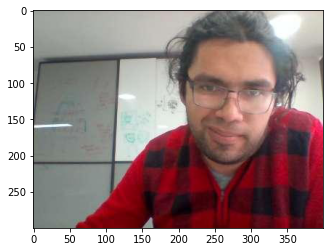

In [15]:
plt.imshow(img)

In [26]:
rects = face_detector(img, 0)

In [28]:
rects

rectangles[[(217, 79) (342, 203)]]

In [62]:
IMG_SIZE = (160, 160)

In [63]:
def crop_images(image, rect, expand=0.4):
    crop_img = Image.fromarray(image.copy())
    crop_img = crop_img.crop((rect.left(), rect.top(), rect.right(), rect.bottom()))
    return np.array(crop_img.resize(IMG_SIZE))[np.newaxis, :, :, :]

In [64]:
for rect in rects:
  crop_img = crop_images(img, rect)

In [65]:
crop_img.shape

(1, 160, 160, 3)

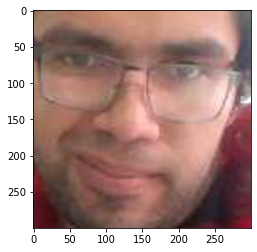

In [47]:
plt.imshow(crop_img)

In [66]:
model(crop_img)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-0.50394297,  0.37806946,  0.09181843,  0.86261034,  0.09287628,
        -0.45395997,  0.7097512 , -0.52045673, -1.0431811 , -0.84728974,
         0.11874215, -1.686088  , -0.561704  ,  1.866501  , -0.9533169 ,
        -0.42702872,  1.053606  , -0.5729613 ,  0.11640824, -0.60917413,
        -0.7909918 , -1.1203346 ,  1.2791735 ,  0.38730317,  1.7120303 ,
         1.4720302 ,  0.76769006,  0.56306136, -0.43425322, -1.9197868 ,
        -0.29968867,  0.15726706, -0.5688518 ,  0.9570323 ,  0.52813387,
         0.30088356,  1.5224322 , -0.11894637,  0.66899633, -0.5201012 ,
        -1.8009791 , -0.13770492, -0.4520261 , -0.37193274,  0.0800994 ,
         0.9580849 , -0.17697315,  1.0056678 ,  0.06112503, -0.16003221,
         0.9660853 ,  0.5711923 ,  0.38830692,  0.49268875,  0.23021697,
         2.1827369 ,  0.2556921 , -1.6862649 ,  2.2832546 ,  0.70236516,
        -0.0519357 ,  1.6860738 ,  0.45658144, -0.31008008, -0.95996016,
 